In [2]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random


In [3]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs,
                       dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)




In [4]:
print((features.size()),features.shape)
print(features[0], labels[0])




torch.Size([1000, 2]) torch.Size([1000, 2])
tensor([ 0.3966, -1.1047]) tensor(8.7447)


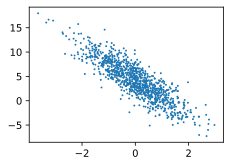

In [5]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

# # 在../d2lzh_pytorch里面添加上面两个函数后就可以这样导入
# import sys
# sys.path.append("..")
# from d2lzh_pytorch import *

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);



# 本函数已保存在d2lzh包中方便以后使用
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)

In [9]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


tensor([[-1.8425e-01, -2.5582e-01],
        [-1.5430e+00,  9.7832e-01],
        [ 5.2245e-01, -3.1699e-01],
        [-2.7428e-01, -7.3304e-01],
        [ 8.1282e-02,  1.4066e-01],
        [ 7.6622e-01, -5.7719e-04],
        [-3.4696e-01, -8.2031e-03],
        [-1.3565e+00,  2.5068e-01],
        [ 8.8759e-01,  5.0951e-01],
        [-8.7850e-01,  2.5573e-01]]) tensor([ 4.6899, -2.2123,  6.3371,  6.1265,  3.8856,  5.7413,  3.5366,  0.6376,
         4.2371,  1.5768])


In [10]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)


In [12]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)


def linreg(X, w, b):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    return torch.mm(X, w) + b

In [13]:
def squared_loss(y_hat, y):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2


def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data

In [14]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数

        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))


epoch 1, loss 0.028959
epoch 2, loss 0.000099
epoch 3, loss 0.000050


In [15]:
print(true_w, '\n', w)
print(true_b, '\n', b)


[2, -3.4] 
 tensor([[ 2.0003],
        [-3.4003]], requires_grad=True)
4.2 
 tensor([4.2002], requires_grad=True)
